# Loading and plotting a spectrum

In this tutorial, we show how to use the `wrap_xspec` package to open a spectrum. 

Note: in order for this to work, you need to have pyXspec installed on your local computer. This means that these tutorials will not work on e.g. Google Colab, unfortunatly. 

In [1]:
#------
# pyXspec import block
# This is necessary for the pyXspec output to be displayed in a jupyter notebook.
%load_ext wurlitzer
import IPython.display
# Note: for this to work with VScode, you need to have initialized 
# heasoft directly in the zshrc (or bashrc) using an alias didn't seem to work.
# If using a classical jupyter that has been lauched from a terminal in which heasoft 
# was initialized with an alias, then the direct initializing in zshrc is not necessary.
import xspec
#------
#xspec.Xset.allowPrompting = False # keeps pyxspec from hanging, waiting for a response to a prompt

import wrap_xspec as wx

import os
import matplotlib.pyplot as plt

`pyXspec` seems to have some difficulty with paths (e.g. if your spectrum is in a different directory than the notebook you are working from). Therefore `wrap_xspec` provides a wrapper that will use the `os` package to move to the path of the spectrum you would like to load and bring you back to the current directory. 

In [2]:
# First, clearing our the spectra and models that might already be in xspec
# Useful if you are running cells multiple times
xspec.AllData.clear()
xspec.AllModels.clear()

my_spec1 = wx.SpectrumLoader('InputData',
             'Dash2_acisf14571_grpSNR3.pi', 'Dash2_acisf14571_bkg.pi',
             'Dash2_acisf14571.rmf', 'Dash2_acisf14571.corr.arf')
spec1 = my_spec1.xspec_load()

my_spec2 = wx.SpectrumLoader('InputData',
             'Dash2_acisf14572_grpSNR3.pi', 'Dash2_acisf14572_bkg.pi',
             'Dash2_acisf14572.rmf', 'Dash2_acisf14572.corr.arf')
spec2 = my_spec2.xspec_load()

## Note: you could do this in one go:
# spec = wx.SpectrumLoader(.....).xspec_load()

Current path: /Users/vpetit/ASTRO/2-Areas/CodesToMaintain/wrap_xspec/Tutorials
Moving to /Users/vpetit/ASTRO/2-Areas/CodesToMaintain/wrap_xspec/Tutorials/InputData

1 spectrum  in use
 
Spectral Data File: Dash2_acisf14571_grpSNR3.pi  Spectrum 1
Net count rate (cts/s) for Spectrum:1  8.410e-03 +/- 4.238e-04 (95.0 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-399
  Telescope: CHANDRA Instrument: ACIS  Channel Type: PI
  Exposure Time: 4.946e+04 sec
 Using fit statistic: chi
 Using Background File                Dash2_acisf14571_bkg.pi
  Background Exposure Time: 4.946e+04 sec
 Using Response (RMF) File            Dash2_acisf14571.rmf for Source 1
 Using Auxiliary Response (ARF) File  Dash2_acisf14571.corr.arf

Net count rate (cts/s) for Spectrum:1  8.410e-03 +/- 4.238e-04 (95.0 % total)
Response successfully loaded.
Arf successfully loaded.
Spectrum 1  Spectral Data File: Dash2_acisf14571_grpSNR3.pi
Net count rate (cts/s) for Spectrum:1  8.410e-03 +/- 4.238e

Note: if the loading seems to take a very long time, check your path and filenames. If a filename is not correct, xspec does not crash, it just stalls. 

We will now create a model, so that we can below see all of the plotting capabilities of `wrap_xspec`. As you can see, we just set the model parameters by hand and we dont actually fit it, just to make this tutorial simple (LINK TO TUTORIAL ABOUT FITTING).

In [3]:
# First, clearing our the models that might already be in xspec
# Useful if you are running cells multiple times
xspec.AllModels.clear()

m = xspec.Model("tbabs(apec+apec)")
m.apec.kT = 0.2
m.apec.norm = 3e-5
m.apec_3.kT = 1.0
m.apec_3.norm = 3e-5
m.TBabs.nH = 0.5


Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.d

Now, we are ready to plot the spectrum. We can use the xspec plotting system to do so, but it might be not very intuitive to novice Xspec users (it is means to emulate the way the command line tools work). 

Therefore `wrap_xspec` provides some classes and functions to gather the plotting data so that they can be used with matplotlib instead.

WARNING: pyXspec is not very pythonic, in the sense that the 'state' of Xspec is **global**. Therefore when using the `xspec.Plot` function, it will plot all of the spectra that are loaded, irrespectively of whether the spectrum objects are stored in variables or not. 

To be able to use the `wrap_xspec` function, we first need to setup the global `xspec.Plot` object. 

In the example below, we will ignore some energy range (just to show how the plots behave), and set the `xspec.Plot.add = True` so that we can later access the additive components of the model. 

Finally, we here set the `xspec.Plot.device = "/svg"` so that the actual xspec graph shows up in the notebook (so that you can see that the `wrap_xspec` functions work correctly!). But in practice, you can set it to `"/null"` instead, if you don't want the native xspec graph to show up in the notebook. 


    10 channels (36-45) ignored in spectrum #     1
     8 channels (31-38) ignored in spectrum #     2
     1 channels (58) ignored in spectrum #     1
     1 channels (49) ignored in spectrum #     2
     1 channels (59) ignored in spectrum #     1
     1 channels (49) ignored in spectrum #     2

Fit statistic  : Chi-Squared                  392.88     using 387 bins, spectrum 1.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 1
                 Chi-Squared                  795.75     using 380 bins, spectrum 2.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 2
Total fit statistic                          1188.63     with 762 d.o.f.

Test statistic : Chi-Squared                 1188.63     using 767 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 1 2 

 Null hypothesis probability of 3.04e-21 with 762 degrees

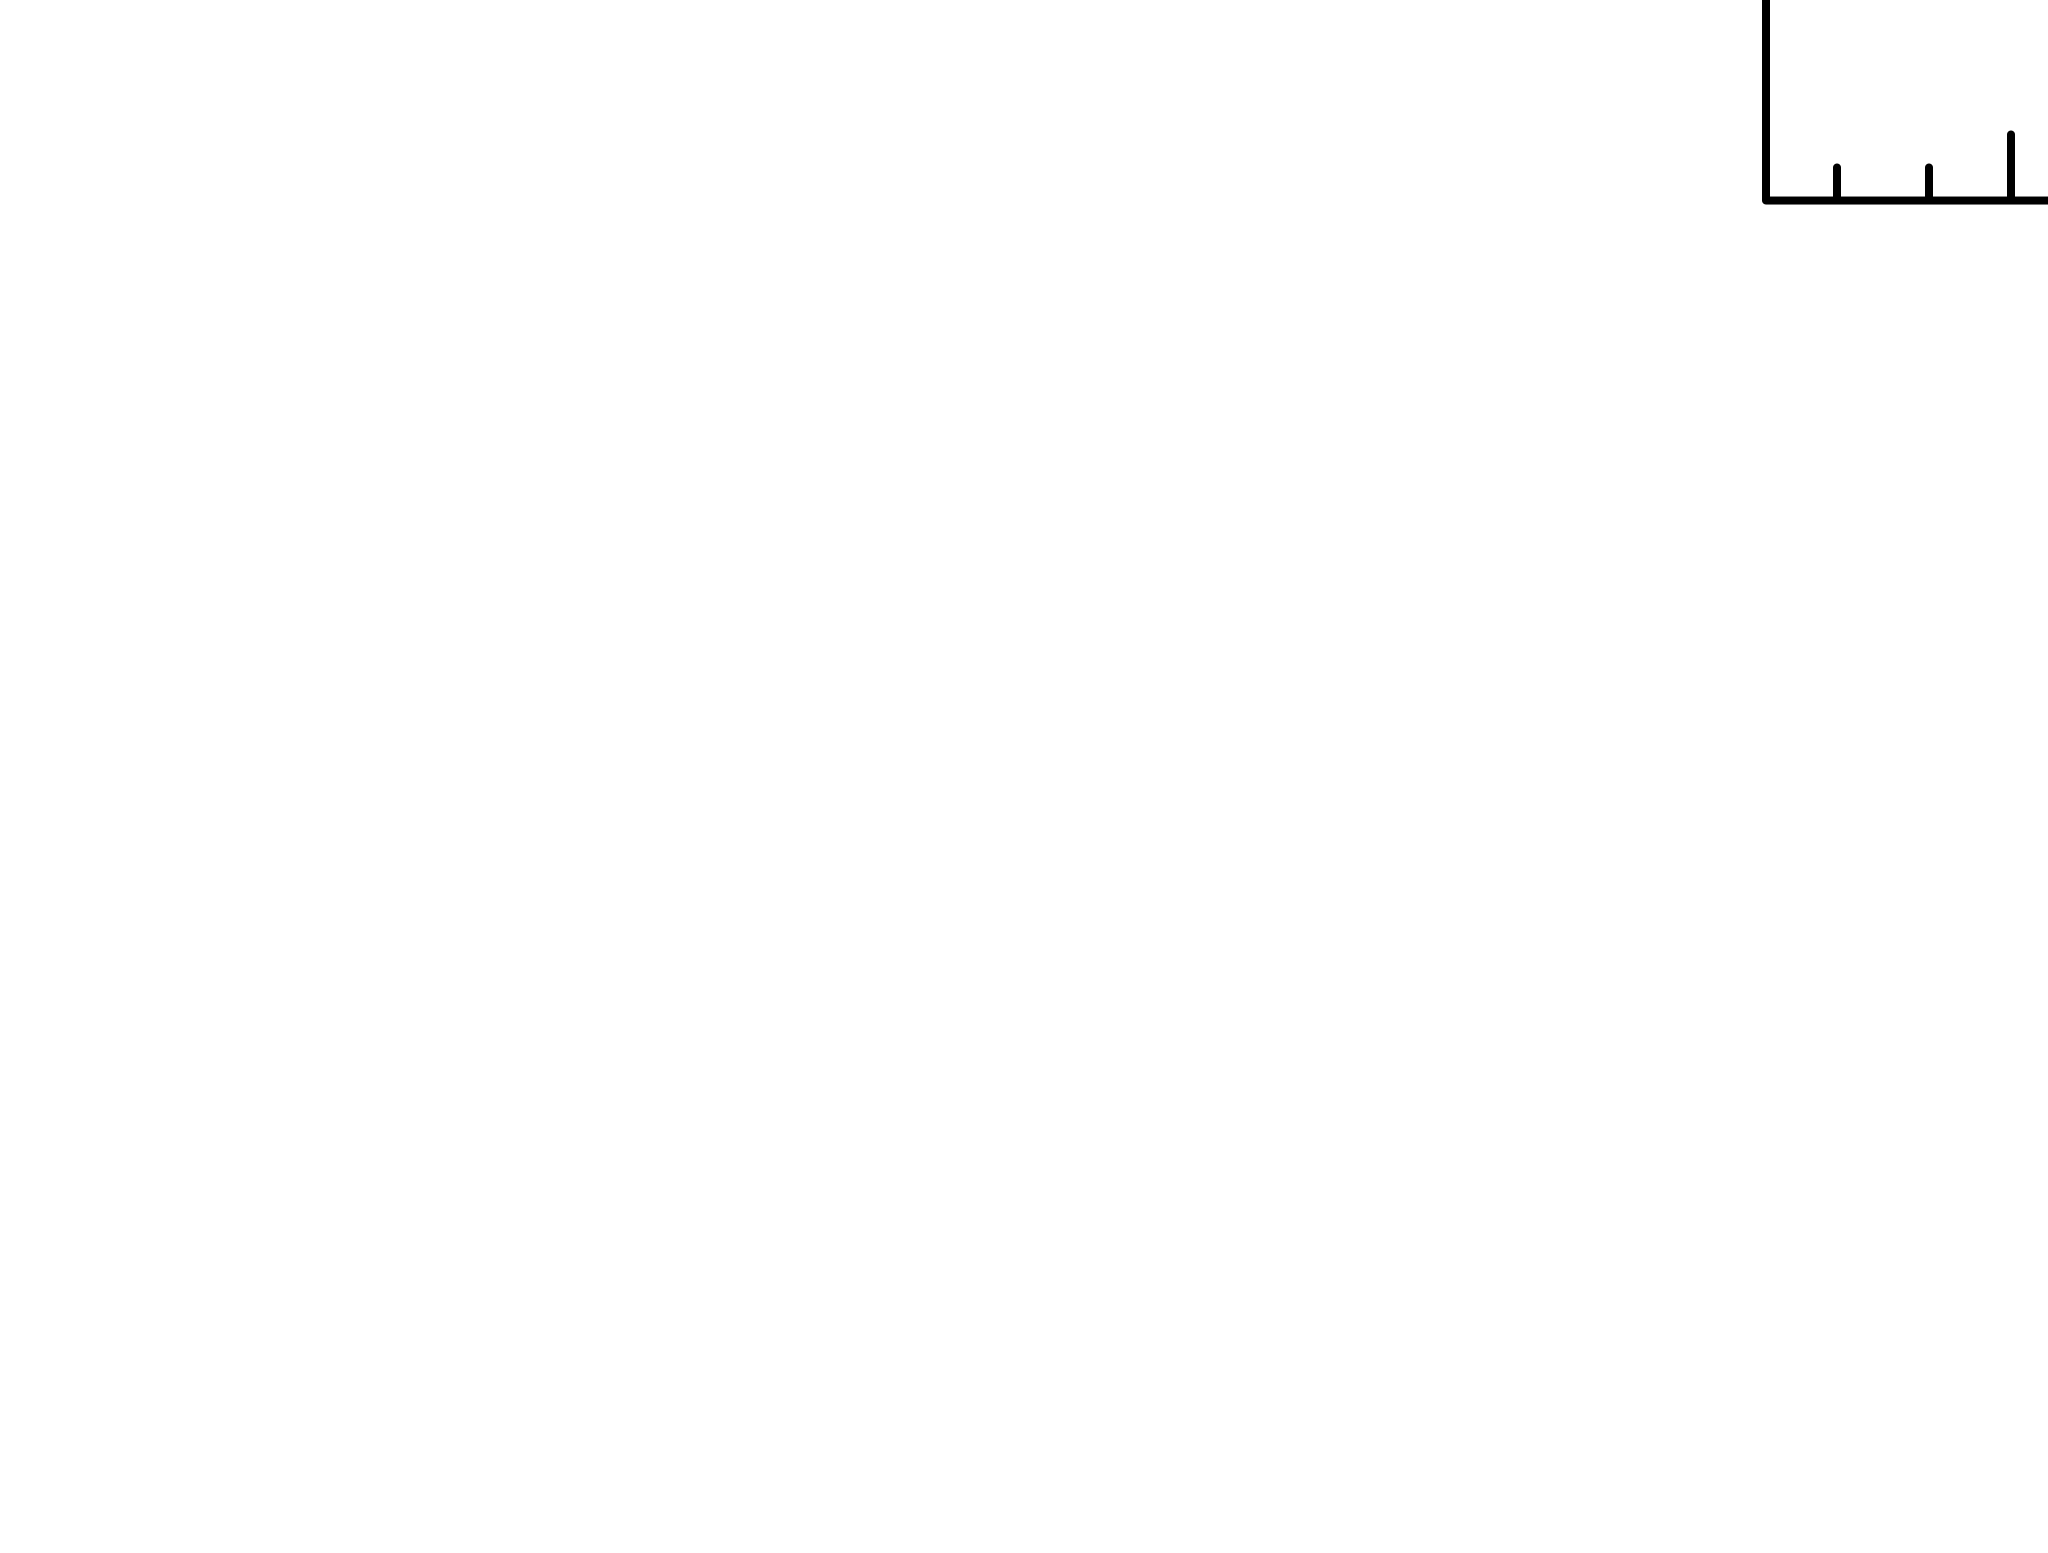

In [4]:
xspec.AllData.ignore("1.5-2.0, 8.0,9.0") # ignoring some energy range
xspec.Plot.device = "/svg" # setting the native xspec graph to show up
xspec.Plot.xAxis = "keV" # setting the x axis is keV
xspec.Plot.add = True # Toggle to get the model additive componenents
#xspec.Plot.background = True # wrap_xspec does not handle the background yet
xspec.Plot("data") # Make the Plot object to create the data+folded model graph.

#xspec.Plot.show() # This will show the status of the Plot object, if needed

Now that the xspec.Plot object has been populated with a "data+folded model" graph, we can use `wrap_xspec` to access the information and make beautiful matplotlib graphs!

The first function `wx.plot.get_SpectrumData(spec)` will take in an xspec.Spectrum object (here, that would be the variable spec1 or spec2 that we created earlier) and return a `PlotData` object. A `PlotData` contains the following information
* x: the values on the xaxis
* y: the values on the yaxis
* dx: the bin size on the xaxis
* dy: the bin size on the y axis,
and provides an array of class functions that will add that `PlotData` object to an existing matplotlib `ax` object. 

In the example below, we first get a `PlotData` for the first spectrum (`spec1`), and then demonstrate all of the implemented class functions. 

Note: all of the plotting function accept their associated `**kwargs`. 
* `plot_err` uses `ax.errorbar` `**kwargs`
* `plot_fill_*` uses `ax.fill_between` `**kwargs`
* The others uses `ax.plot``**kwargs`


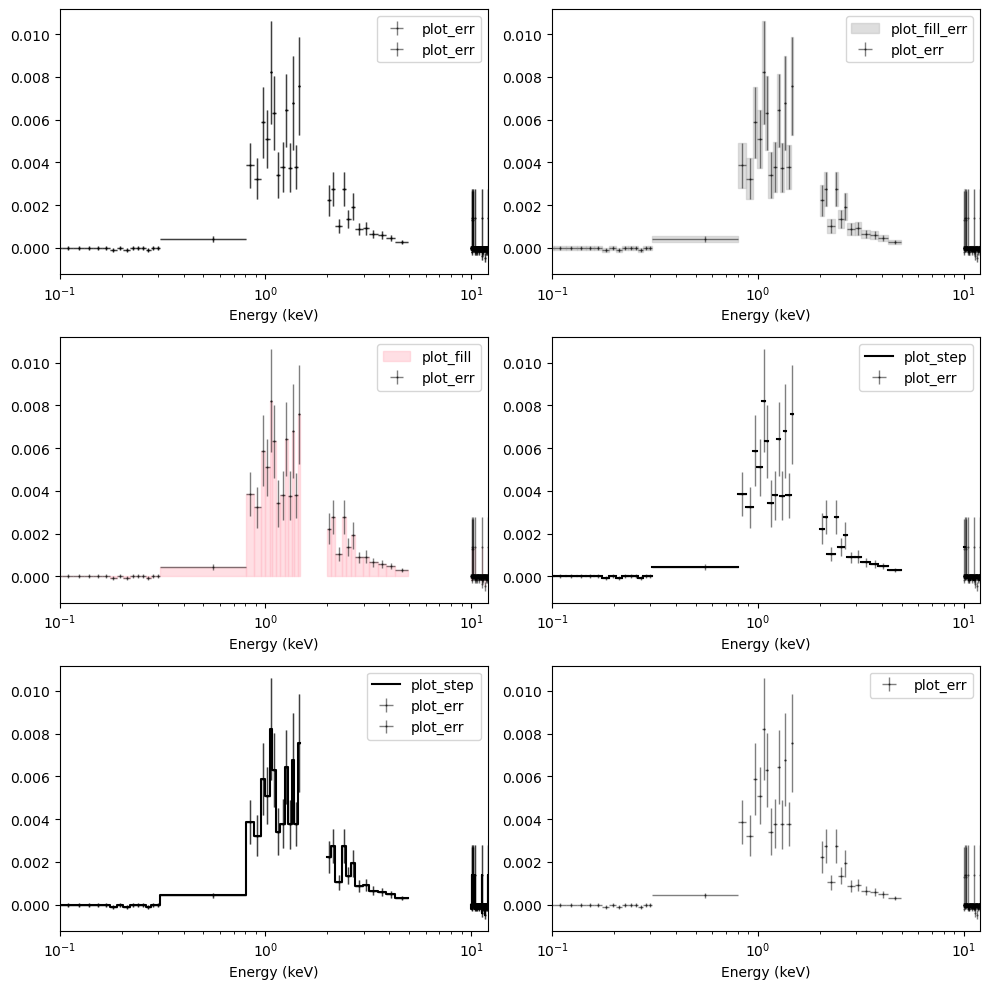

In [5]:
plotdata1 = wx.plot.get_SpectrumData(spec1)

fig, ax = plt.subplots(3,2, figsize=(10,10))

for item in ax.flatten():
    item = plotdata1.plot_err(item, c='k', ms='1', lw=1, alpha=0.5, label='plot_err')
ax[0,0] = plotdata1.plot_err(ax[0,0], c='k', ms='1', lw=1, alpha=0.5, label='plot_err')
ax[1,0] = plotdata1.plot_fill(ax[1,0], color='pink', alpha=0.5, label='plot_fill')
ax[0,1] = plotdata1.plot_fill_err(ax[0,1], color='0.75', alpha=0.5, label='plot_fill_err')
ax[1,1] = plotdata1.plot_step(ax[1,1], label='plot_step')
ax[2,0] = plotdata1.plot_step_h(ax[2,0], label='plot_step')
ax[2,0] = plotdata1.plot_err(ax[2,0], c='k', ms='1', lw=1, alpha=0.5, label='plot_err')

for item in ax.flatten():
    item.set_xscale('log')
    item.set_xlabel('Energy (keV)')
    item.set_xlim(0.1,12)
    item.legend(loc=0)
plt.tight_layout()

If we would like to overplot the two spectra, we can simply create a `PlotData` object for `spec2`

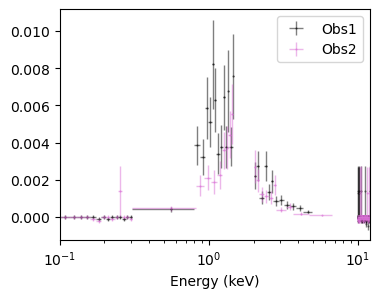

In [6]:
plotdata2 = wx.plot.get_SpectrumData(spec2)

fig, ax = plt.subplots(1,1, figsize=(4,3))

ax = plotdata1.plot_err(ax, c='k', ms='1', lw=1, alpha=0.5, label='Obs1')
ax = plotdata2.plot_err(ax, c='orchid', ms='1', lw=1, alpha=0.5, label='Obs2')

ax.set_xscale('log')
ax.set_xlabel('Energy (keV)')
ax.set_xlim(0.1,12)
ax.legend(loc=0)

The folded models can be accessed with the `wrap_xspec.plot.get_ModelData(spec)` function, which will return a `PlotData` object that will contain the folded model associated with a given `xspec.Spectrum` object. 

In the example below, we gather the folded model for the 2 spectra, and overplot them with the data (the latter using the variable we have already defined in the previous cell). We used a different plotting function for the two models (`PlotData.step_h` for Obs1 and `PlotData.step` for Obs2.)

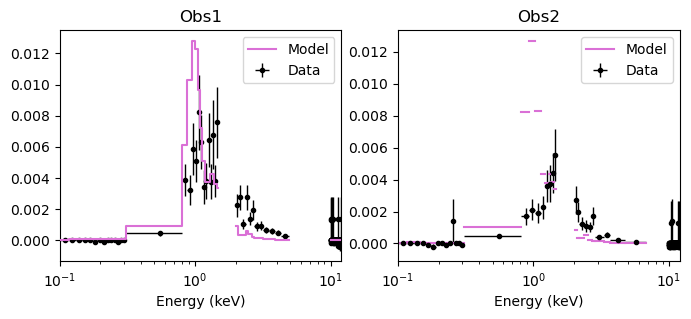

In [7]:
plotmodel1 = wx.plot.get_ModelData(spec1)
plotmodel2 = wx.plot.get_ModelData(spec2)

fig, ax = plt.subplots(1,2, figsize=(8,3))

ax[0] = plotdata1.plot_err(ax[0], c='k', lw=1, label='Data')
ax[0] = plotmodel1.plot_step_h(ax[0], c='orchid', label='Model', zorder=3000)
ax[0].set_title('Obs1')

ax[1] = plotdata2.plot_err(ax[1], c='k', lw=1, label='Data')
ax[1] = plotmodel2.plot_step(ax[1], c='orchid', label='Model')
ax[1].set_title('Obs2')

for item in ax:
    item.set_xscale('log')
    item.set_xlabel('Energy (keV)')
    item.set_xlim(0.1,12)
    item.legend(loc=0)

Finally, we can also access the two additive components in the model, using the `wrap_xspec.plot.get_ModelCompData(spec)`. This function returns a list of PlotData objects.

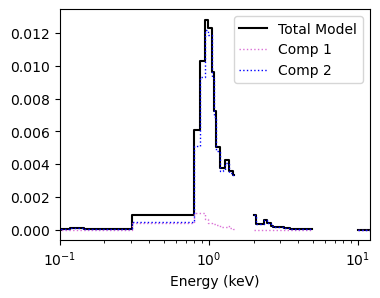

In [8]:
plotcomp1 = wx.plot.get_ModelCompData(spec1)

fig, ax = plt.subplots(1,1, figsize=(4,3))

ax = plotmodel1.plot_step_h(ax, c='k', label='Total Model')

color = ['orchid', 'blue']
for i in range(0,len(plotcomp1)):
    ax = plotcomp1[i].plot_step_h(ax, ls='dotted', label='Comp {}'.format(i+1), lw=1, c=color[i])

ax.set_xscale('log')
ax.set_xlabel('Energy (keV)')
ax.set_xlim(0.1,12)
ax.legend(loc=0)

A final note is that `PlotData` object can be written to an ascii file with the `.save(file)`, and then loaded back with with the `wx.plot.read_PlotData(file)` function. 

This might be useful in your workflow, if you would like to e.g. to a whole bunch of fitting and MCMC in one notebook, and then make the plots in another notebook. 

In [9]:
plotdata1.save('OutputData/SavedSpectrum.txt')

read_plotdata1 = wx.plot.read_PlotData('OutputData/SavedSpectrum.txt')
print(read_plotdata1)

## Troubleshooting and catching errors